# Telephone customer churn case study

- Identify the churn customers from the given dataset csv
- Provided CSVs -> `customer_data.csv`, `internet_data.csv`, `churn_data.csv`

#### Import all relevant Libraries

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns", None)

## Step 1: Load and understand the data

#### Loading `customer_data.csv`

In [2]:
cust_df = pd.read_csv("customer_data.csv")
print(cust_df.shape)
cust_df.head()

(7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


#### Loading `internet_data.csv`

In [3]:
int_df = pd.read_csv("internet_data.csv")
print(int_df.shape)
int_df.head()

(7043, 9)


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Loading `churn_data.csv`

In [4]:
churn_df = pd.read_csv("churn_data.csv")
print(churn_df.shape)
churn_df.head()

(7043, 9)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


#### Merge Customer and internet data to one dataframe

In [5]:
df1 = pd.merge(cust_df, int_df, on="customerID")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


#### Merge Churn data also to that dataframe

In [6]:
# Merged the data of churn, internet and customer to telecomDF

telecom_df = pd.merge(df1, churn_df, on="customerID")
print(telecom_df.shape)
telecom_df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


#### Print the below
- Unique Values in each column
- Info of the dataFrame
- Describe the numerical columns in the dataframe
- Print the first five rows of the dataframe

In [7]:
print(telecom_df.nunique())
print("++++++++++++++++++******************++++++++++++++++++")
print(telecom_df.info())
print("++++++++++++++++++******************++++++++++++++++++")
print(telecom_df.describe())
print("++++++++++++++++++******************++++++++++++++++++")
telecom_df.head()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
++++++++++++++++++******************++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents   

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


#### Conver 'Yes and 'No' to 1 and 0
- Partner
- Dependents
- PhoneService
- PaperlessBilling
- Churn

In [8]:
def convertYesNoToNumeric(value):
    return value.map({"Yes": 1, "No": 0})

# convert all Yes/No to 1/0
binary_col = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

telecom_df[binary_col] = telecom_df[binary_col].apply(convertYesNoToNumeric)

Print Unique values in each column

In [9]:
print(telecom_df.nunique())
telecom_df.head()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.700,151.65,1


#### Get the info of the dataframe

In [10]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


#### Print the % of null values in each column

In [11]:
telecom_df.isnull().sum() * 100 / telecom_df.shape[0]

customerID         0.000
gender             0.000
SeniorCitizen      0.000
Partner            0.000
Dependents         0.000
MultipleLines      0.000
InternetService    0.000
OnlineSecurity     0.000
OnlineBackup       0.000
DeviceProtection   0.000
TechSupport        0.000
StreamingTV        0.000
StreamingMovies    0.000
tenure             0.000
PhoneService       0.000
Contract           0.000
PaperlessBilling   0.000
PaymentMethod      0.000
MonthlyCharges     0.000
TotalCharges       0.000
Churn              0.000
dtype: float64

#### Convert String to float with setting not convertable values to null

In [12]:
#The varaible was imported as a string we need to convert it to float
telecom_df['TotalCharges'] =telecom_df["TotalCharges"].apply(pd.to_numeric, errors='coerce') 

#### Remove the null values

In [13]:
telecom_df = telecom_df[~np.isnan(telecom_df['TotalCharges'])]

#### Print the percentile of all numeric columns

In [14]:
telecom_df.describe(percentiles=[0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000,7032.000,7032.000,7032.000,7032.000,7032.000,7032.000,7032.000,7032.000
mean,0.162,0.483,0.298,32.422,0.903,0.593,64.798,2283.300,0.266
std,0.369,0.500,0.458,24.545,0.296,0.491,30.086,2266.771,0.442
min,0.000,0.000,0.000,1.000,0.000,0.000,18.250,18.800,0.000
25%,0.000,0.000,0.000,9.000,1.000,0.000,35.587,401.450,0.000
50%,0.000,0.000,0.000,29.000,1.000,1.000,70.350,1397.475,0.000
75%,0.000,1.000,1.000,55.000,1.000,1.000,89.862,3794.738,1.000
80%,0.000,1.000,1.000,60.800,1.000,1.000,94.300,4475.410,1.000
85%,1.000,1.000,1.000,65.000,1.000,1.000,98.600,5200.150,1.000
90%,1.000,1.000,1.000,69.000,1.000,1.000,102.645,5976.640,1.000


## Step 2: Data visualisation on cleaned data

#### Divide columns into Continuous (numeric), Categorical and Others

In [15]:
cont_col = ["tenure", "MonthlyCharges", "TotalCharges"]

cat_col = ["gender", "SeniorCitizen", "Partner", "Dependents", "MultipleLines", "InternetService", 
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
           "StreamingMovies", "PhoneService", "Contract", "PaperlessBilling", "PaymentMethod"]

other = ["customerID"]

#### Print the count graph for 
- Tenure
- Monthly Charges
- Total Charges

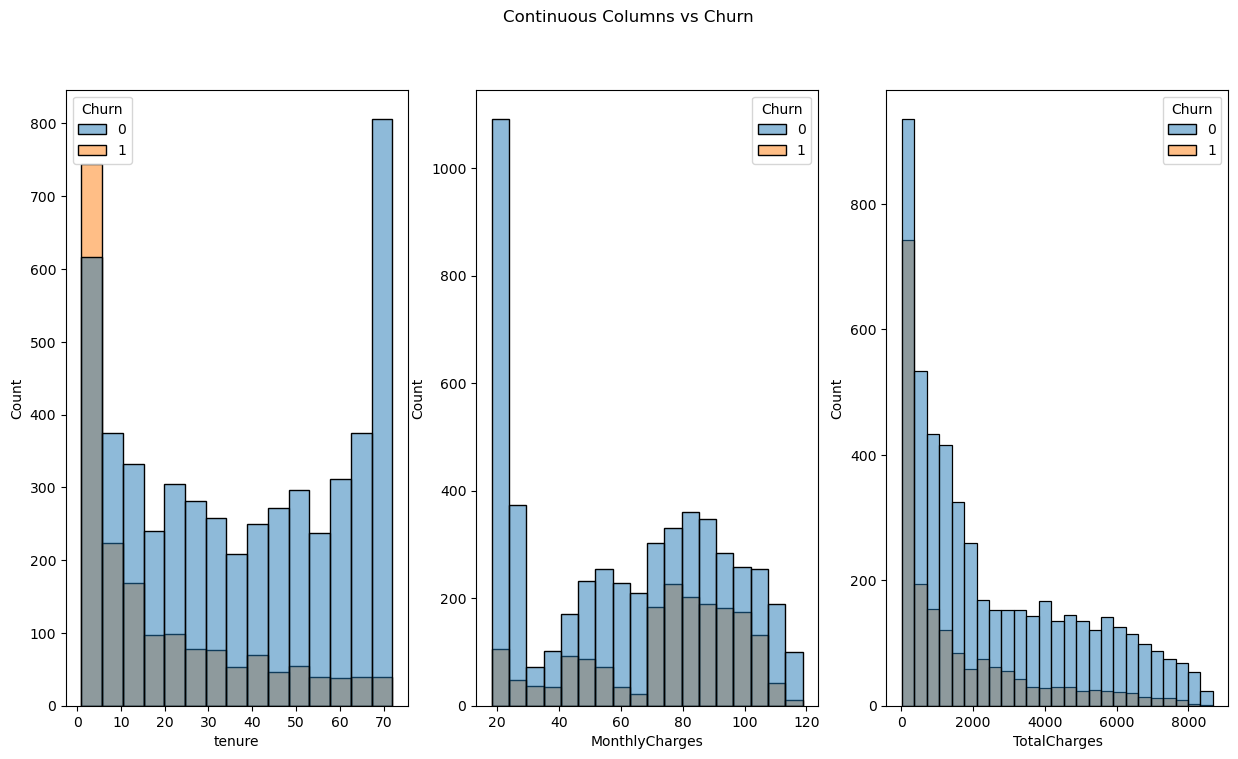

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,8))
fig.suptitle("Continuous Columns vs Churn")

for index, col in enumerate(cont_col):
    sns.histplot(ax=axes[index], data=telecom_df, x=col, hue="Churn")

#### Print the count graph of churn and existing customers for all categorical columns

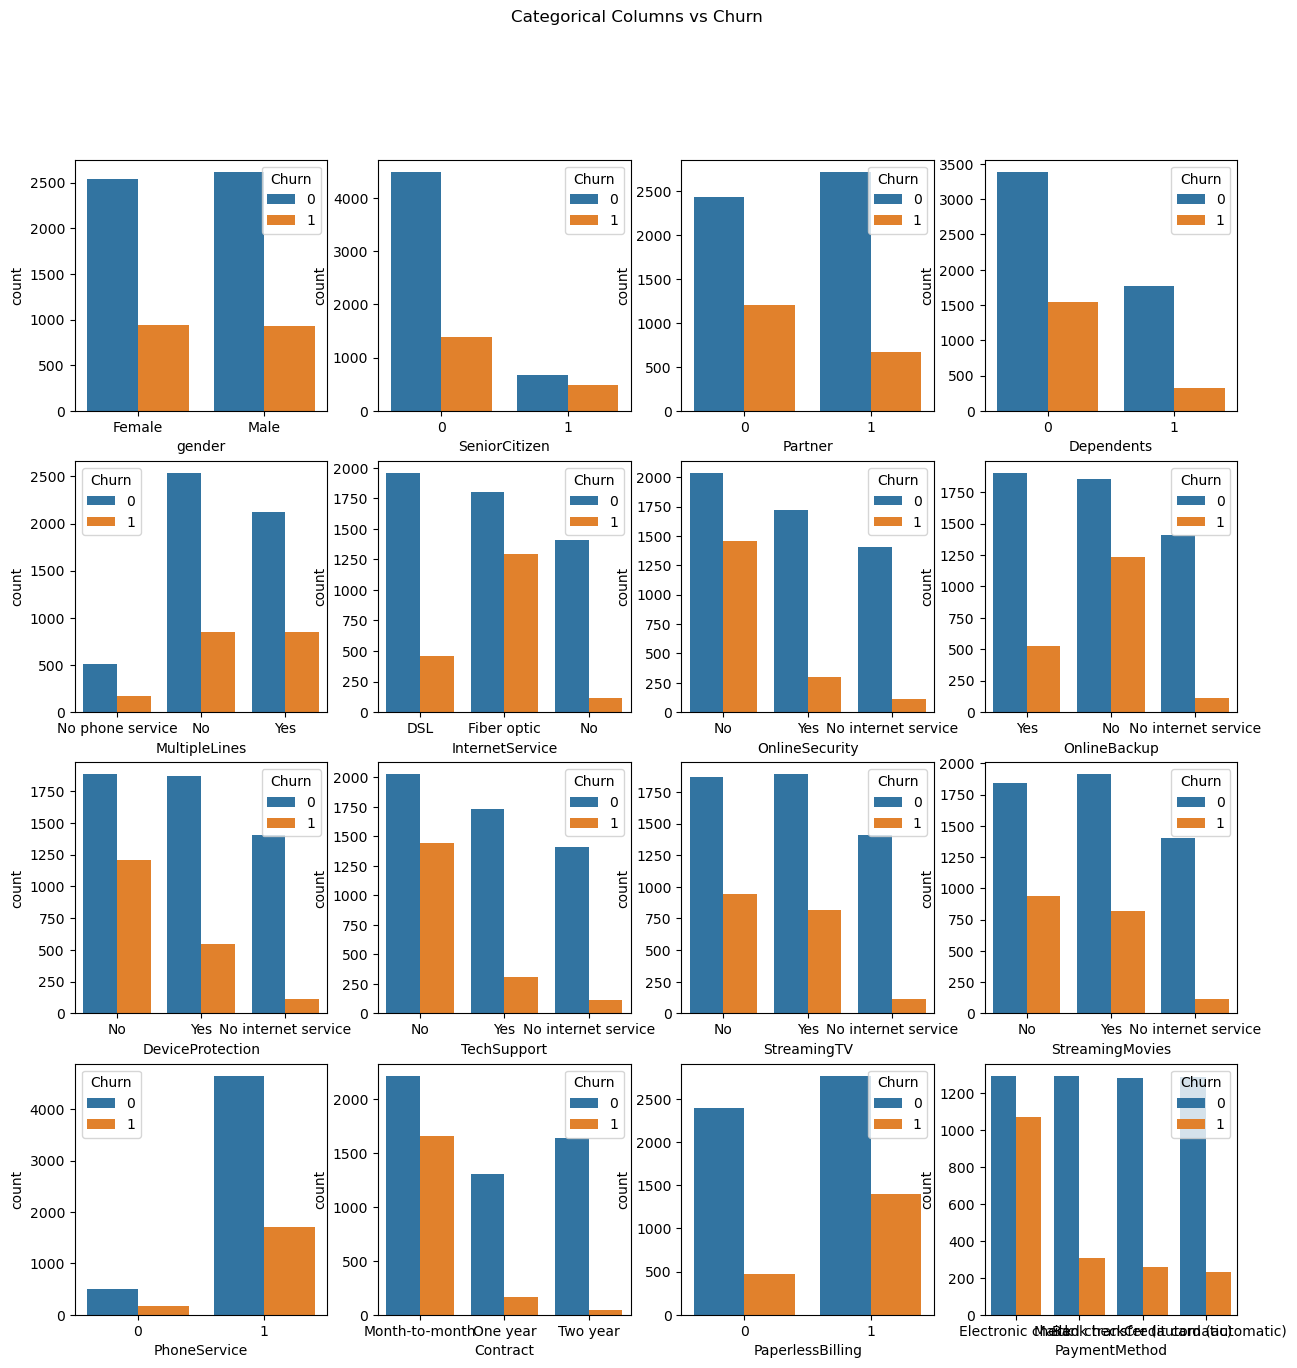

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
fig.suptitle("Categorical Columns vs Churn")

for index, col in enumerate(cat_col):
    plotRow = int(index / 4)
    plotCol = index % 4
    sns.countplot(ax=axes[plotRow][plotCol], data=telecom_df, x=col, hue="Churn")

Print the info of the dataframe

In [18]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  tenure            7032 non-null   int64  
 14  PhoneService      7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


#### Drop the column `customerID`

In [19]:
telecom_df = telecom_df.drop(["customerID"], axis=1)

#### Convert columns to category to etract dummy columns

In [20]:
dummy_cols = ["gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
             "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
for col in dummy_cols:
    telecom_df[col] = telecom_df[col].astype("category")

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   MultipleLines     7032 non-null   category
 5   InternetService   7032 non-null   category
 6   OnlineSecurity    7032 non-null   category
 7   OnlineBackup      7032 non-null   category
 8   DeviceProtection  7032 non-null   category
 9   TechSupport       7032 non-null   category
 10  StreamingTV       7032 non-null   category
 11  StreamingMovies   7032 non-null   category
 12  tenure            7032 non-null   int64   
 13  PhoneService      7032 non-null   int64   
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   int64   
 16  PaymentMethod     7032 n

#### Create Dummy columns

In [21]:
telecom_df = pd.get_dummies(telecom_df, drop_first=True)
print(telecom_df.shape)
telecom_df.info()

(7032, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender_Male                            7032 non-null   uint8  
 10  MultipleLines_No phone service         7032 non-null   uint8 

## Step 3: Divide the data into train-test split

#### Import necessary Libraries

In [22]:
import sklearn
# Spliting the train and test
from sklearn.model_selection import train_test_split

# rescaling the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# automated column selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as st_api
# find the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#### Divide into X and y

In [23]:
y_telecom_df = telecom_df.pop("Churn")
X_telecom_df = telecom_df

#### Extract the Train and test rows

In [24]:
X_train_telecom_df, X_test_telecom_df, y_train_telecom_df, y_test_telecom_df = train_test_split(X_telecom_df, y_telecom_df, 
                                                                                               train_size=0.7, random_state=100)

In [25]:
scaler = StandardScaler()
X_train_telecom_df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(X_train_telecom_df[["tenure", "MonthlyCharges", "TotalCharges"]])
X_train_telecom_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,0,0,0,0.020,1,1,-0.338,-0.276,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5790,0,1,1,0.305,0,1,-0.464,-0.113,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
6498,0,0,0,-1.286,1,1,0.581,-0.974,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
880,0,0,0,-0.919,1,1,1.506,-0.551,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
2784,0,0,1,-1.164,1,1,1.107,-0.836,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


#### Get the percentage of Churn users

In [26]:
churn = (sum(y_telecom_df) / y_telecom_df.shape[0]) * 100
churn

26.578498293515356

## Step 4: Logistic Regression

#### Define the Logistic Regression with 15 feature select

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_telecom_df, y_train_telecom_df)

rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train_telecom_df, y_train_telecom_df)

#### List out all the columns based on if they are selected or not along with pririty of the columns

In [28]:
list(zip(X_train_telecom_df, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 14),
 ('Dependents', False, 13),
 ('tenure', True, 1),
 ('PhoneService', False, 11),
 ('PaperlessBilling', False, 3),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 15),
 ('MultipleLines_No phone service', False, 10),
 ('MultipleLines_Yes', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_No internet service', False, 4),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_No internet service', False, 8),
 ('OnlineBackup_Yes', False, 12),
 ('DeviceProtection_No internet service', False, 7),
 ('DeviceProtection_Yes', False, 16),
 ('TechSupport_No internet service', True, 1),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_No internet service', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No internet service', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Cr

#### Get the supported columns in the dataframe

In [29]:
supported_cols = X_train_telecom_df.columns[rfe.support_]
X_train_telecom_df_rfe = X_train_telecom_df[supported_cols]
X_train_telecom_df_rfe.shape

(4922, 15)

#### Create X and y model

In [30]:
def createModel(local_X_train, local_y_train):
    newModel = st_api.add_constant(local_X_train)
    lr_model = st_api.GLM(local_y_train, newModel, family=st_api.families.Binomial())
    res = lr_model.fit()
    return (lr_model, res)

In [31]:
x_model = st_api.add_constant(X_train_telecom_df_rfe)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()


# _, res = createModel(X_train_telecom_df_rfe, y_train_telecom_df)
# res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Wed, 07 Feb 2024   Deviance:                       4053.2
Time:                        23:10:31   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2780
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3307      0.161    -14.463      0.000      -2.647      -2.015
SeniorCitizen                           0.4662      0.099      4.710      0.000       0.272       0.660
tenure                                 -1.5609      0.187     -8.360      0.000      -1.927      -1.195
MonthlyCharges                         -1.1603      0.184     -6.295      0.000      -1.522      -0.799
TotalCharges                            0.7295      0.197      3.704      0.000       0.343       1.116
MultipleLines_Yes                       0.4394      0.102      4.318      0.000       0.240       0.639
InternetService_Fiber optic             1.8713      0.197      9.488      0.000       1.485       2.258
InternetService_No                     -0.4608      0.053     -8.679      0.000      -0.565      -0.357
TechSupport_No internet service        -0.4608      0.053     -8.679      0.000      -0.565      -0.357
StreamingTV_No internet service        -0.4608      0.053     -8.679      0.000      -0.565      -0.357
StreamingTV_Yes                         0.6614      0.111      5.945      0.000       0.443       0.879
StreamingMovies_No internet service    -0.4608      0.053     -8.679      0.000      -0.565      -0.357
StreamingMovies_Yes                     0.5378      0.109      4.925      0.000       0.324       0.752
Contract_One year                      -0.7557      0.127     -5.968      0.000      -1.004      -0.508
Contract_Two year                      -1.4447      0.208     -6.952      0.000      -1.852      -1.037
PaymentMethod_Mailed check             -0.3290      0.108     -3.033      0.002      -0.542      -0.116
=======================================================================================================
"""

In [32]:
y_train_telecom_predict = res.predict(x_model)
y_train_telecom_predict[:10]

879    0.150
5790   0.240
6498   0.541
880    0.506
2784   0.660
3874   0.348
5387   0.528
6623   0.785
4465   0.187
5364   0.555
dtype: float64

#### Churn prediction vs Actual churn

In [33]:
y_train_telecom_pred_final = pd.DataFrame({"Churn": y_train_telecom_df.values, "Churn_Pred": y_train_telecom_predict})
y_train_telecom_pred_final["CustId"] = y_train_telecom_df.index
y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId
879,0,0.150,879
5790,0,0.240,5790
6498,1,0.541,6498
880,1,0.506,880
2784,1,0.660,2784


### Creating a new columns `Predicted`, if Churn value is > 0.5 then 1 else 0

In [34]:
y_train_telecom_pred_final["Predicted"] = y_train_telecom_pred_final.Churn_Pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId,Predicted
879,0,0.150,879,0
5790,0,0.240,5790,0
6498,1,0.541,6498,1
880,1,0.506,880,1
2784,1,0.660,2784,1


## Confusion matrix

In [35]:
confusion = metrics.confusion_matrix(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted)
confusion

array([[3273,  362],
       [ 599,  688]])

#### Churn vs Churn prediction accuracy

In [36]:
confusion_accuracy_score = metrics.accuracy_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted)
confusion_accuracy_score * 100

80.4754164973588

#### Check VIF common function

In [37]:
def checkVIF(x_train_dataset):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = x_train_dataset.columns
    vif['VIF'] = [variance_inflation_factor(x_train_dataset.values, i) for i in range(x_train_dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
checkVIF(X_train_telecom_df_rfe)

,Features,VIF
6,InternetService_No,inf
7,TechSupport_No internet service,inf
8,StreamingTV_No internet service,inf
10,StreamingMovies_No internet service,inf
2,MonthlyCharges,13.380
3,TotalCharges,10.330
1,tenure,7.300
5,InternetService_Fiber optic,4.470
13,Contract_Two year,2.710
9,StreamingTV_Yes,2.620


#### As VIF of `InternetService_No` is `inf`, we will drop it

In [39]:
X_train_telecom_df_rfe_new2 = X_train_telecom_df_rfe.drop("InternetService_No", axis=1)

In [40]:
x_model = st_api.add_constant(X_train_telecom_df_rfe_new2)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Wed, 07 Feb 2024   Deviance:                       4053.2
Time:                        23:10:32   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2780
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3307      0.161    -14.463      0.000      -2.647      -2.015
SeniorCitizen                           0.4662      0.099      4.710      0.000       0.272       0.660
tenure                                 -1.5609      0.187     -8.360      0.000      -1.927      -1.195
MonthlyCharges                         -1.1603      0.184     -6.295      0.000      -1.522      -0.799
TotalCharges                            0.7295      0.197      3.704      0.000       0.343       1.116
MultipleLines_Yes                       0.4394      0.102      4.318      0.000       0.240       0.639
InternetService_Fiber optic             1.8713      0.197      9.488      0.000       1.485       2.258
TechSupport_No internet service        -0.6144      0.071     -8.679      0.000      -0.753      -0.476
StreamingTV_No internet service        -0.6144      0.071     -8.679      0.000      -0.753      -0.476
StreamingTV_Yes                         0.6614      0.111      5.945      0.000       0.443       0.879
StreamingMovies_No internet service    -0.6144      0.071     -8.679      0.000      -0.753      -0.476
StreamingMovies_Yes                     0.5378      0.109      4.925      0.000       0.324       0.752
Contract_One year                      -0.7557      0.127     -5.968      0.000      -1.004      -0.508
Contract_Two year                      -1.4447      0.208     -6.952      0.000      -1.852      -1.037
PaymentMethod_Mailed check             -0.3290      0.108     -3.033      0.002      -0.542      -0.116
=======================================================================================================
"""

#### As VIF of `TechSupport_No internet service` is `inf`, we will drop it

In [41]:
checkVIF(X_train_telecom_df_rfe_new2)

,Features,VIF
6,TechSupport_No internet service,inf
7,StreamingTV_No internet service,inf
9,StreamingMovies_No internet service,inf
2,MonthlyCharges,13.380
3,TotalCharges,10.330
1,tenure,7.300
5,InternetService_Fiber optic,4.470
12,Contract_Two year,2.710
8,StreamingTV_Yes,2.620
10,StreamingMovies_Yes,2.620


In [42]:
X_train_telecom_df_rfe_new3 = X_train_telecom_df_rfe_new2.drop("TechSupport_No internet service", axis=1)

In [43]:
x_model = st_api.add_constant(X_train_telecom_df_rfe_new3)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Wed, 07 Feb 2024   Deviance:                       4053.2
Time:                        23:10:32   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2780
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3307      0.161    -14.463      0.000      -2.647      -2.015
SeniorCitizen                           0.4662      0.099      4.710      0.000       0.272       0.660
tenure                                 -1.5609      0.187     -8.360      0.000      -1.927      -1.195
MonthlyCharges                         -1.1603      0.184     -6.295      0.000      -1.522      -0.799
TotalCharges                            0.7295      0.197      3.704      0.000       0.343       1.116
MultipleLines_Yes                       0.4394      0.102      4.318      0.000       0.240       0.639
InternetService_Fiber optic             1.8713      0.197      9.488      0.000       1.485       2.258
StreamingTV_No internet service        -0.9215      0.106     -8.679      0.000      -1.130      -0.713
StreamingTV_Yes                         0.6614      0.111      5.945      0.000       0.443       0.879
StreamingMovies_No internet service    -0.9215      0.106     -8.679      0.000      -1.130      -0.713
StreamingMovies_Yes                     0.5378      0.109      4.925      0.000       0.324       0.752
Contract_One year                      -0.7557      0.127     -5.968      0.000      -1.004      -0.508
Contract_Two year                      -1.4447      0.208     -6.952      0.000      -1.852      -1.037
PaymentMethod_Mailed check             -0.3290      0.108     -3.033      0.002      -0.542      -0.116
=======================================================================================================
"""

#### As VIF of `StreamingTV_No internet service` is `inf`, we will drop it

In [44]:
checkVIF(X_train_telecom_df_rfe_new3)

,Features,VIF
6,StreamingTV_No internet service,inf
8,StreamingMovies_No internet service,inf
2,MonthlyCharges,13.380
3,TotalCharges,10.330
1,tenure,7.300
5,InternetService_Fiber optic,4.470
11,Contract_Two year,2.710
7,StreamingTV_Yes,2.620
9,StreamingMovies_Yes,2.620
4,MultipleLines_Yes,2.260


In [45]:
X_train_telecom_df_rfe_new4 = X_train_telecom_df_rfe_new3.drop("StreamingTV_No internet service", axis=1)

In [46]:
x_model = st_api.add_constant(X_train_telecom_df_rfe_new4)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Wed, 07 Feb 2024   Deviance:                       4053.2
Time:                        23:10:32   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2780
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3307      0.161    -14.463      0.000      -2.647      -2.015
SeniorCitizen                           0.4662      0.099      4.710      0.000       0.272       0.660
tenure                                 -1.5609      0.187     -8.360      0.000      -1.927      -1.195
MonthlyCharges                         -1.1603      0.184     -6.295      0.000      -1.522      -0.799
TotalCharges                            0.7295      0.197      3.704      0.000       0.343       1.116
MultipleLines_Yes                       0.4394      0.102      4.318      0.000       0.240       0.639
InternetService_Fiber optic             1.8713      0.197      9.488      0.000       1.485       2.258
StreamingTV_Yes                         0.6614      0.111      5.945      0.000       0.443       0.879
StreamingMovies_No internet service    -1.8431      0.212     -8.679      0.000      -2.259      -1.427
StreamingMovies_Yes                     0.5378      0.109      4.925      0.000       0.324       0.752
Contract_One year                      -0.7557      0.127     -5.968      0.000      -1.004      -0.508
Contract_Two year                      -1.4447      0.208     -6.952      0.000      -1.852      -1.037
PaymentMethod_Mailed check             -0.3290      0.108     -3.033      0.002      -0.542      -0.116
=======================================================================================================
"""

#### As VIF of `MonthlyCharges` is `high`, we will drop it

In [47]:
checkVIF(X_train_telecom_df_rfe_new4)

,Features,VIF
2,MonthlyCharges,13.380
3,TotalCharges,10.330
1,tenure,7.300
7,StreamingMovies_No internet service,4.880
5,InternetService_Fiber optic,4.470
10,Contract_Two year,2.710
6,StreamingTV_Yes,2.620
8,StreamingMovies_Yes,2.620
4,MultipleLines_Yes,2.260
9,Contract_One year,1.680


In [48]:
X_train_telecom_df_rfe_new5 = X_train_telecom_df_rfe_new4.drop("MonthlyCharges", axis=1)

In [49]:
x_model = st_api.add_constant(X_train_telecom_df_rfe_new5)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.8
Date:                Wed, 07 Feb 2024   Deviance:                       4093.6
Time:                        23:10:33   Pearson chi2:                 5.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2720
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.6272      0.110    -14.768      0.000      -1.843      -1.411
SeniorCitizen                           0.5173      0.098      5.255      0.000       0.324       0.710
tenure                                 -1.2438      0.178     -6.998      0.000      -1.592      -0.895
TotalCharges                            0.2989      0.183      1.630      0.103      -0.060       0.658
MultipleLines_Yes                       0.1965      0.093      2.117      0.034       0.015       0.378
InternetService_Fiber optic             0.8475      0.106      8.001      0.000       0.640       1.055
StreamingTV_Yes                         0.3066      0.095      3.221      0.001       0.120       0.493
StreamingMovies_No internet service    -0.8978      0.152     -5.908      0.000      -1.196      -0.600
StreamingMovies_Yes                     0.2048      0.095      2.160      0.031       0.019       0.391
Contract_One year                      -0.8385      0.125     -6.686      0.000      -1.084      -0.593
Contract_Two year                      -1.5565      0.207     -7.535      0.000      -1.961      -1.152
PaymentMethod_Mailed check             -0.3214      0.107     -2.997      0.003      -0.532      -0.111
=======================================================================================================
"""

In [50]:
checkVIF(X_train_telecom_df_rfe_new5)

,Features,VIF
2,TotalCharges,7.100
1,tenure,6.790
9,Contract_Two year,2.600
4,InternetService_Fiber optic,2.590
7,StreamingMovies_Yes,2.520
5,StreamingTV_Yes,2.500
6,StreamingMovies_No internet service,2.280
3,MultipleLines_Yes,2.210
8,Contract_One year,1.590
10,PaymentMethod_Mailed check,1.500


#### As VIF of `TotalCharges` is `high`, we will drop it

In [51]:
X_train_telecom_df_rfe_new6 = X_train_telecom_df_rfe_new5.drop("TotalCharges", axis=1)

In [52]:
x_model = st_api.add_constant(X_train_telecom_df_rfe_new6)
lr_model = st_api.GLM(y_train_telecom_df, x_model, family=st_api.families.Binomial())
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.2
Date:                Wed, 07 Feb 2024   Deviance:                       4096.3
Time:                        23:10:33   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2716
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.6649      0.107    -15.534      0.000      -1.875      -1.455
SeniorCitizen                           0.5181      0.099      5.250      0.000       0.325       0.712
tenure                                 -0.9764      0.064    -15.157      0.000      -1.103      -0.850
MultipleLines_Yes                       0.2228      0.091      2.441      0.015       0.044       0.402
InternetService_Fiber optic             0.9233      0.095      9.700      0.000       0.737       1.110
StreamingTV_Yes                         0.3427      0.093      3.701      0.000       0.161       0.524
StreamingMovies_No internet service    -0.9136      0.151     -6.046      0.000      -1.210      -0.617
StreamingMovies_Yes                     0.2394      0.092      2.590      0.010       0.058       0.421
Contract_One year                      -0.8310      0.125     -6.652      0.000      -1.076      -0.586
Contract_Two year                      -1.5267      0.205     -7.456      0.000      -1.928      -1.125
PaymentMethod_Mailed check             -0.2983      0.106     -2.809      0.005      -0.506      -0.090
=======================================================================================================
"""

In [53]:
checkVIF(X_train_telecom_df_rfe_new6)

,Features,VIF
8,Contract_Two year,2.520
6,StreamingMovies_Yes,2.450
4,StreamingTV_Yes,2.440
3,InternetService_Fiber optic,2.410
2,MultipleLines_Yes,2.180
1,tenure,1.960
5,StreamingMovies_No internet service,1.790
7,Contract_One year,1.580
9,PaymentMethod_Mailed check,1.490
0,SeniorCitizen,1.280


In [54]:
y_train_telecom_predict = res.predict(x_model)
y_train_telecom_predict[:10]

879    0.188
5790   0.201
6498   0.626
880    0.677
2784   0.726
3874   0.326
5387   0.371
6623   0.778
4465   0.135
5364   0.574
dtype: float64

#### Churn vs Churn Prediction metrix

In [55]:
y_train_telecom_pred_final = pd.DataFrame({"Churn": y_train_telecom_df.values, "Churn_Pred": y_train_telecom_predict})
y_train_telecom_pred_final["CustId"] = y_train_telecom_df.index
y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId
879,0,0.188,879
5790,0,0.201,5790
6498,1,0.626,6498
880,1,0.677,880
2784,1,0.726,2784


#### Churn prediction metrix based on prediction value based on 0.1 to 0.9 

In [56]:
y_train_telecom_pred_final["Predicted"] = y_train_telecom_pred_final.Churn_Pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId,Predicted
879,0,0.188,879,0
5790,0,0.201,5790,0
6498,1,0.626,6498,1
880,1,0.677,880,1
2784,1,0.726,2784,1


#### Confusion metrix

In [57]:
confusion = metrics.confusion_matrix(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted)
confusion

array([[3271,  364],
       [ 608,  679]])

#### Metrics accuracy score

In [58]:
confusion_accuracy_score = metrics.accuracy_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted)
confusion_accuracy_score * 100

80.2519301097115

## Confusion metrics

In [59]:
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative
TP = confusion[1,1] #True Positive

### Sensitivity

In [60]:
(TP / float(TP + FN)) * 100

52.75835275835276

### Specificity

In [61]:
(TN / float(TN + FP)) * 100

89.98624484181568

### False Positive Rate - FPR
considering the customer as churn when customer does not have churn <br/>
`FPR = 1 - Specificity`

In [62]:
(FP / float(TN + FP)) * 100

10.013755158184319

### Positive Predictive Value - PPV
All the positive that we have predicted, how many times we were right

In [63]:
(TP / float(TP + FP)) * 100

65.1006711409396

### Negative Predictive Value - NPV
All the negatives that we have predicted, how many times we were right

In [64]:
(TN / float(TN + FN)) * 100

84.32585717968549

## ROC curve

#### Common ROC curve function

In [65]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Churn_Pred)

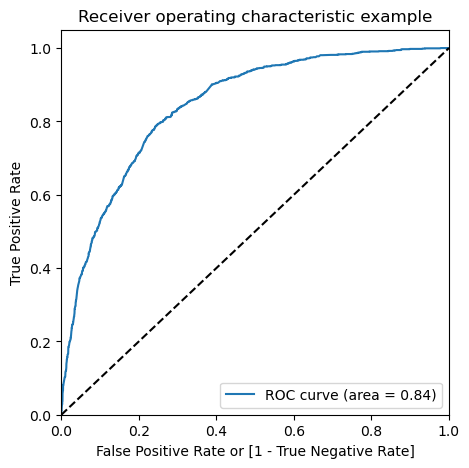

In [67]:
draw_roc(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Churn_Pred)

## Find the optimal Cutoff point

In [68]:
cuttoff_numbers = [float(x) / 10 for x in range(10)]
for i in cuttoff_numbers:
    y_train_telecom_pred_final[i] = y_train_telecom_pred_final.Churn_Pred.map(lambda x: 1 if x > i else 0)

y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.188,879,0,1,1,0,0,0,0,0,0,0,0
5790,0,0.201,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.626,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.677,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.726,2784,1,1,1,1,1,1,1,1,1,0,0


In [69]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [70]:
num = [float(x) / 10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final[i])
    
    total1=sum(sum(cm1))
    # accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    # specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    # sensitivity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.261  1.000  0.000
0.100 0.100     0.608  0.946  0.488
0.200 0.200     0.718  0.855  0.669
0.300 0.300     0.764  0.789  0.755
0.400 0.400     0.788  0.627  0.845
0.500 0.500     0.803  0.528  0.900
0.600 0.600     0.800  0.386  0.947
0.700 0.700     0.773  0.184  0.982
0.800 0.800     0.745  0.028  0.998
0.900 0.900     0.739  0.000  1.000


### Graph of `accuracy`, `sensitivity` and `specificity` vs probability

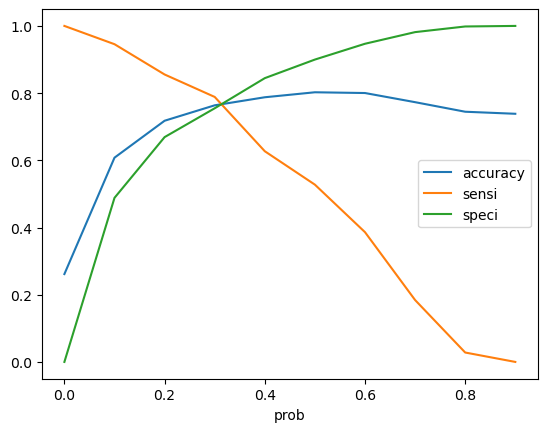

In [71]:
cutoff_df.plot.line(x = 'prob', y=['accuracy','sensi','speci'])
plt.show()

## Optimal cutoff point

In [72]:
y_train_telecom_pred_final["final_Predicted"] = y_train_telecom_pred_final.Churn_Pred.map(lambda x: 1 if x > 0.3 else 0)
y_train_telecom_pred_final.head()


,Churn,Churn_Pred,CustId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
879,0,0.188,879,0,1,1,0,0,0,0,0,0,0,0,0
5790,0,0.201,5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.626,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.677,880,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.726,2784,1,1,1,1,1,1,1,1,1,0,0,1


#### Accuracy score based on 0.3 churn prediction

In [73]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.final_Predicted)

0.7637139374238114

In [74]:
cuttoff_numbers = [float(x) / 10 for x in range(10)]
for i in cuttoff_numbers:
    y_train_telecom_pred_final[i] = y_train_telecom_pred_final.Churn_Pred.map(lambda x: 1 if x > i else 0)

y_train_telecom_pred_final.head()

,Churn,Churn_Pred,CustId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
879,0,0.188,879,0,1,1,0,0,0,0,0,0,0,0,0
5790,0,0.201,5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.626,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.677,880,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.726,2784,1,1,1,1,1,1,1,1,1,0,0,1


#### Confusion metrics based on `final prediction`

In [75]:
confusion2 = metrics.confusion_matrix(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.final_Predicted)
confusion2

array([[2744,  891],
       [ 272, 1015]])

In [76]:
TN2 = confusion[0,0] #True Negative
FP2 = confusion[0,1] #False Positive
FN2 = confusion[1,0] #False Negative
TP2 = confusion[1,1] #True Positive

In [77]:
confusion_accuracy_score2 = metrics.accuracy_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.final_Predicted)
confusion_accuracy_score2 * 100

76.37139374238114

In [78]:
print("Sensitivity", (TP2 / float(TP2 + FN2)) * 100)
print("Specificity", (TN2 / float(TN2 + FP2)) * 100)
print("FPR", (FP2 / float(TN2 + FP2)) * 100)
print("PPV",(TP2 / float(TP2 + FP2)) * 100)
print("NPV", (TN2 / float(TN2 + FN2)) * 100)

Sensitivity 52.75835275835276
Specificity 89.98624484181568
FPR 10.013755158184319
PPV 65.1006711409396
NPV 84.32585717968549


## Precision and Recall

### Precision
TP / (TP + FP)

In [79]:
(TP2 / float(TP2 + FP2)) * 100

65.1006711409396

### Recall
TP / (TP + FN)

In [80]:
(TP2 / float(TP2 + FN2)) * 100

52.75835275835276

In [81]:
precision_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted) * 100

65.1006711409396

In [82]:
recall_score(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Predicted) * 100

52.75835275835276

### Precision and Recall curve

In [83]:
p, r, pr_thresholds = precision_recall_curve(y_train_telecom_pred_final.Churn, y_train_telecom_pred_final.Churn_Pred)

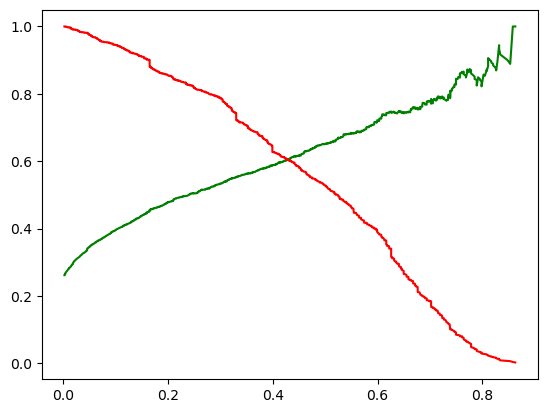

In [84]:
plt.plot(pr_thresholds, p[:-1], "g-") # Precision
plt.plot(pr_thresholds, r[:-1], "r-") # Recall
plt.show()

## Making Predictions on the test sets

In [85]:
X_test_telecom_df
X_test_telecom_df[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test_telecom_df[['tenure','MonthlyCharges','TotalCharges']])


In [86]:
X_test_telecom_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,0,0,0,-0.348,1,1,0.500,-0.128,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3730,0,1,0,0.999,1,1,1.320,1.600,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
1761,0,0,0,1.040,1,1,-1.342,-0.343,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0
2283,0,0,0,-1.286,1,1,0.224,-0.979,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1872,0,1,1,0.346,1,0,-1.500,-0.656,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0


In [87]:
X_train_telecom_df_rfe_new6.columns

Index(['SeniorCitizen', 'tenure', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_Mailed check'],
      dtype='object')

In [88]:
X_test_telecom_df = X_test_telecom_df[X_train_telecom_df_rfe_new6.columns]

In [89]:
X_test_telecom_sm = st_api.add_constant(X_test_telecom_df)

In [90]:
y_test_telecom_predict = res.predict(X_test_telecom_sm)

In [91]:
y_test_telecom_predict[:10]

942    0.459
3730   0.287
1761   0.007
2283   0.554
1872   0.012
1970   0.650
2532   0.308
1616   0.005
2485   0.555
5914   0.203
dtype: float64

In [92]:
y_test_telecom_predict_1 = pd.DataFrame(y_test_telecom_predict)

In [93]:
y_test_telecom_predict_1.head()

,0
942,0.459
3730,0.287
1761,0.007
2283,0.554
1872,0.012


In [94]:
y_test_telecom_df.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [95]:
y_test_telecom_df_1 = pd.DataFrame(y_test_telecom_df)

In [96]:
y_test_telecom_df_1.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [97]:
y_test_telecom_df_1['CustID'] = y_test_telecom_df_1.index

In [98]:
y_test_telecom_predict_1.reset_index(drop=True, inplace=True)
y_test_telecom_df_1.reset_index(drop=True, inplace=True)

In [99]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_telecom_df_1, y_test_telecom_predict_1],axis=1)

In [100]:
y_pred_final.head()


,Churn,CustID,0
0,0,942,0.459
1,1,3730,0.287
2,0,1761,0.007
3,1,2283,0.554
4,0,1872,0.012


In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [102]:
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.459
1,1,3730,0.287
2,0,1761,0.007
3,1,2283,0.554
4,0,1872,0.012


In [103]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [104]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.459,1
1,1,3730,0.287,0
2,0,1761,0.007,0
3,1,2283,0.554,1
4,0,1872,0.012,0


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.737914691943128

In [106]:
confusion3 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion3

array([[1129,  399],
       [ 154,  428]])

In [107]:
TP3 = confusion2[1,1] # true positive 
TN3 = confusion2[0,0] # true negatives
FP3 = confusion2[0,1] # false positives
FN3 = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP3 / float(TP3+FN3)

0.7886557886557887

In [109]:
# Let us calculate specificity
TN3 / float(TN3+FP3)

0.7548830811554332

## Decision Trees

### Decision Tree Train Test Split

In [123]:
X_train_telecom_df_dt, X_test_telecom_df_dt, y_train_telecom_df_dt, y_test_telecom_df_dt = train_test_split(X_telecom_df, y_telecom_df, 
                                                                                               train_size=0.7, random_state=100)

In [125]:
X_train_telecom_df_dt.shape, X_test_telecom_df_dt.shape, y_train_telecom_df_dt.shape, y_test_telecom_df_dt.shape

((4922, 30), (2110, 30), (4922,), (2110,))

In [126]:
X_train_telecom_df_dt[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(X_train_telecom_df_dt[["tenure", "MonthlyCharges", "TotalCharges"]])
X_train_telecom_df_dt.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,0,0,0,0.020,1,1,-0.338,-0.276,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5790,0,1,1,0.305,0,1,-0.464,-0.113,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
6498,0,0,0,-1.286,1,1,0.581,-0.974,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
880,0,0,0,-0.919,1,1,1.506,-0.551,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
2784,0,0,1,-1.164,1,1,1.107,-0.836,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


In [127]:
X_test_telecom_df_dt[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.transform(X_test_telecom_df_dt[["tenure", "MonthlyCharges", "TotalCharges"]])
X_test_telecom_df_dt.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,0,0,0,-0.348,1,1,0.500,-0.128,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3730,0,1,0,0.999,1,1,1.320,1.600,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
1761,0,0,0,1.040,1,1,-1.342,-0.343,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0
2283,0,0,0,-1.286,1,1,0.224,-0.979,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1872,0,1,1,0.346,1,0,-1.500,-0.656,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0


### Common Functionality

In [118]:
def get_dt_graph(dt_classifier, columns):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, 
                    filled=True,rounded=True,
                    feature_names=columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [132]:
def evaluate_model(dt_classifier, X_train, X_test, y_train, y_test):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)), "\n")
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)), "\n")
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

#Classification report
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [111]:
dt = DecisionTreeClassifier()

In [113]:
params = {
    'max_depth': [2, 3, 5, 8, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20, 30, 40, 50, 80, 100],
    'criterion': ["gini", "entropy"]
}

In [114]:
gridCV = GridSearchCV(estimator=dt, param_grid=params,
                     cv=4, verbose=1, n_jobs=1,
                     scoring='accuracy')

In [128]:
%%time
gridCV.fit(X_train_telecom_df_dt, y_train_telecom_df_dt)

Fitting 4 folds for each of 126 candidates, totalling 504 fits
CPU times: user 5.34 s, sys: 24.4 ms, total: 5.36 s
Wall time: 5.51 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 30, 40, 50, 80,
                                              100]},
             scoring='accuracy', verbose=1)

In [129]:
dt_best = gridCV.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)

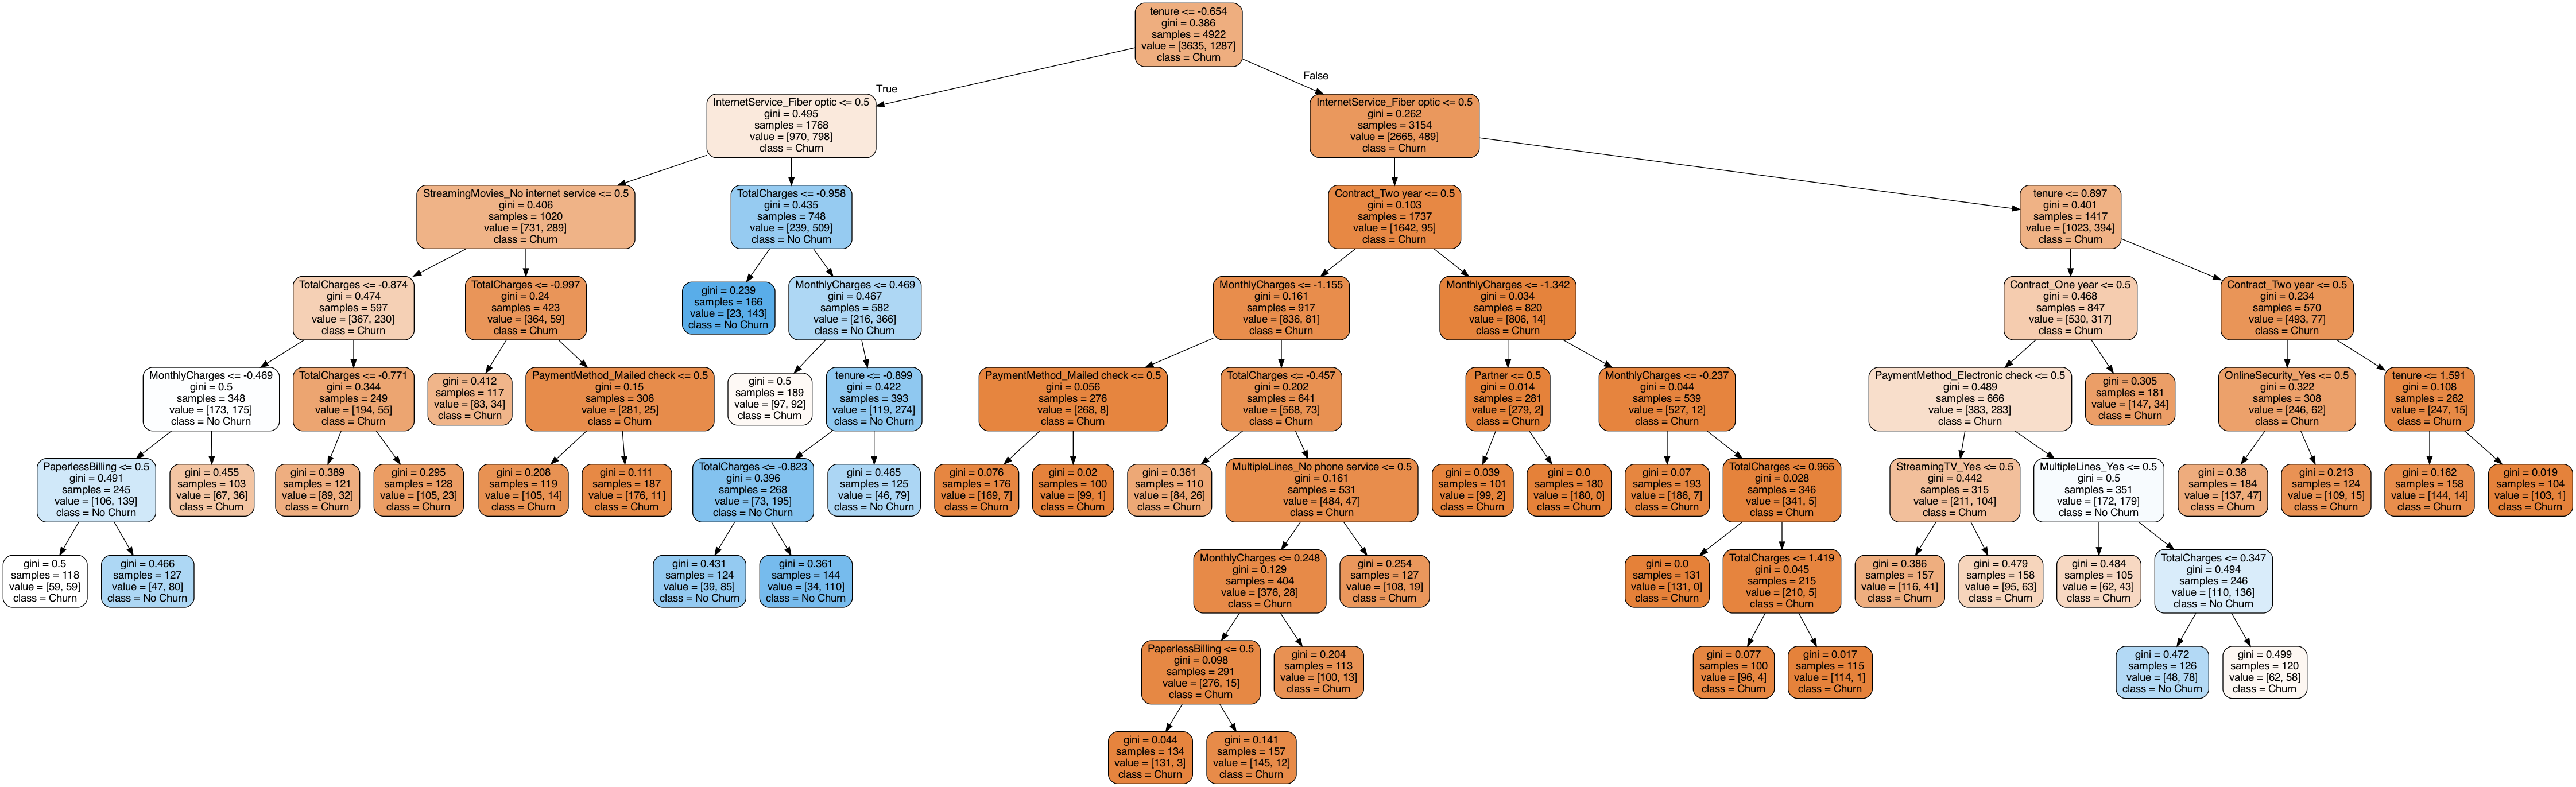

In [130]:
gph = get_dt_graph(dt_best, X_train_telecom_df.columns)
Image(gph.create_png())

In [133]:
evaluate_model(dt_best, X_train_telecom_df_dt, X_test_telecom_df_dt, y_train_telecom_df_dt, y_test_telecom_df_dt)

Train Accuracy : 0.8071921982933766 

Train Confusion Matrix:
[[3398  237]
 [ 712  575]]
--------------------------------------------------
Test Accuracy : 0.7843601895734598 

Test Confusion Matrix:
[[1404  124]
 [ 331  251]]


In [136]:
dt_df = pd.DataFrame({'Feature importance': X_train_telecom_df_dt.columns, 'importance score': dt_best.feature_importances_})
dt_df.sort_values(by='importance score', ascending=False)


,Feature importance,importance score
3,tenure,0.395
11,InternetService_Fiber optic,0.352
7,TotalCharges,0.086
23,StreamingMovies_No internet service,0.049
6,MonthlyCharges,0.036
25,Contract_One year,0.026
28,PaymentMethod_Electronic check,0.018
26,Contract_Two year,0.017
10,MultipleLines_Yes,0.005
22,StreamingTV_Yes,0.005
